In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
try:
    import kid_readout
except ImportError:
    import sys
    sys.path.append('/home/gjones/kid_readout/')

In [3]:
import kid_readout.analysis.process_mmw_response

no data directory set up for clouds defaulting to /data


In [27]:
mmw = kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2015-12-19_220136_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',12)

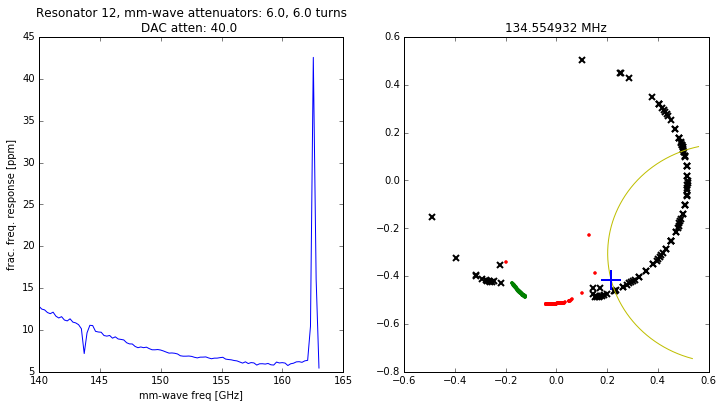

In [28]:
blah = mmw.plot()

In [29]:
import kid_readout.utils.readoutnc

In [7]:
mmw.aligned_data.shape

(100, 128)

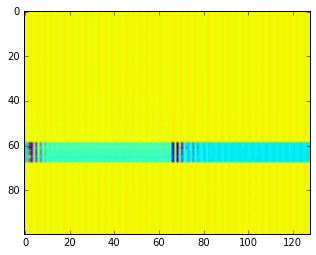

In [10]:
imshow(mmw.aligned_data.imag)

In [13]:
(256e6/2**14)/122.

128.0737704918033

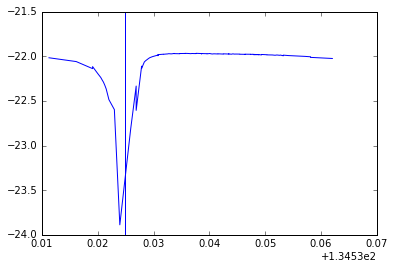

In [32]:
plot(mmw.sweep_freq,20*np.log10(np.abs(mmw.sweep_s21)))
gca().axvline(mmw.measurement_freq)

In [31]:
mmw.measurement_freq

134.554931640625

In [34]:
s21c=mmw.sweep_s21*np.exp(-2j*np.pi*200.1*mmw.sweep_freq) 

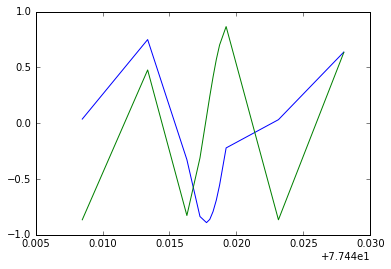

In [35]:
#plot(mmw.sweep_s21.real)
plot(mmw.sweep_freq,s21c.real)
plot(mmw.sweep_freq,s21c.imag)

In [33]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2015-12-19_230127_mmw_frequency_sweep_hittite_level_0.000_dBm.nc')

In [37]:
from kid_readout.analysis import resonator,khalil

134.555596489
-82.3240034353
134.559035565


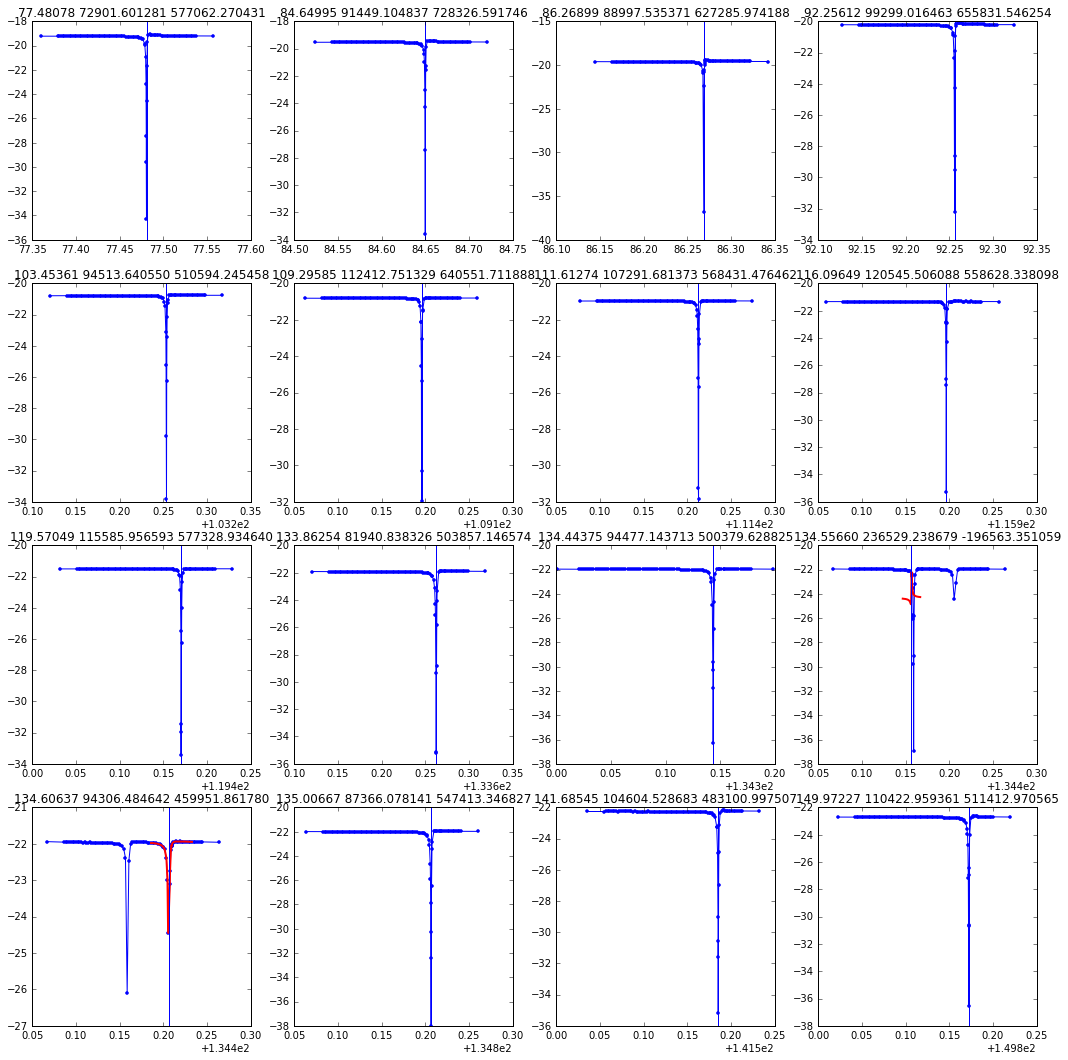

In [49]:
fig,axs = subplots(4,4,figsize=(18,18))
fits = []
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = rnc.sweep_20151219230127.select_by_index(k)
    res = resonator.fit_best_resonator(fr,s21,errors=err,min_a=1,delay_estimate=-63.68)
    ax.plot(fr,20*np.log10(np.abs(s21)),'.-')
    if np.abs(res.f_0 - 134.5556) < 1e-4:
        print res.f_0
        mask = np.abs(fr-134.5556) < 10e-3
        res = resonator.fit_best_resonator(fr[mask],s21[mask],errors=err[mask],min_a=1,delay_estimate=-63.68)
        #ax.plot(fr[mask],20*np.log10(np.abs(s21))[mask],'r',lw=2)
        fr2 = np.linspace(res.f_0-10e-3,res.f_0+10e-3,1000)
        ax.plot(fr2,20*np.log10(np.abs(res.model(x=fr2))),'r',lw=2)
        print res.delay
    elif np.abs(res.f_0-134.55904) < 1e-4:
        print res.f_0
        mask = np.abs(fr-134.60904) < 25e-3
        res = resonator.fit_best_resonator(fr[mask],s21[mask],errors=err[mask],min_a=1,delay_estimate=-63.68)
        ax.plot(fr[mask],20*np.log10(np.abs(s21))[mask],'r',lw=2)
    ax.set_title('%.5f %f %f' % (res.f_0,res.Q,res.Q_i))
    fits.append(res)
    ax.axvline(res.f_0)
    

In [50]:
f0s = np.array([res.f_0 for res in fits])

In [51]:
f0s

array([  77.48078261,   84.64994753,   86.26898965,   92.25611569,
        103.45360859,  109.29584791,  111.61274285,  116.09649218,
        119.5704887 ,  133.86254462,  134.44374873,  134.55659813,
        134.60636808,  135.00667106,  141.68544927,  149.9722711 ])

In [52]:
np.save('/artemis/readout/resonances/2015-12-20-0813f12-200mK.npy',f0s)

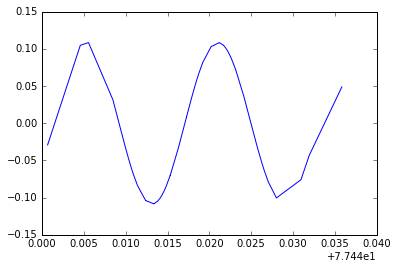

In [38]:
plot(fr,s21.real)

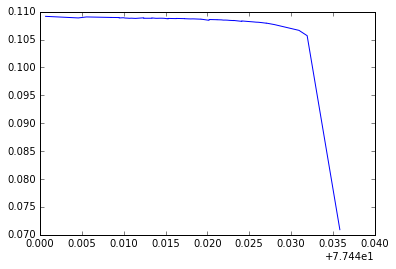

In [39]:
plot(fr,np.abs(s21))

In [16]:
mmw.sweep_s21.shape

(12,)

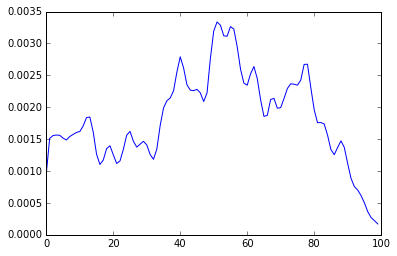

In [18]:
plot(mmw.zbd_voltage)

In [53]:
rnc = kid_readout.utils.readoutnc.ReadoutNetCDF('/artemis/readout/2015-12-20_1)

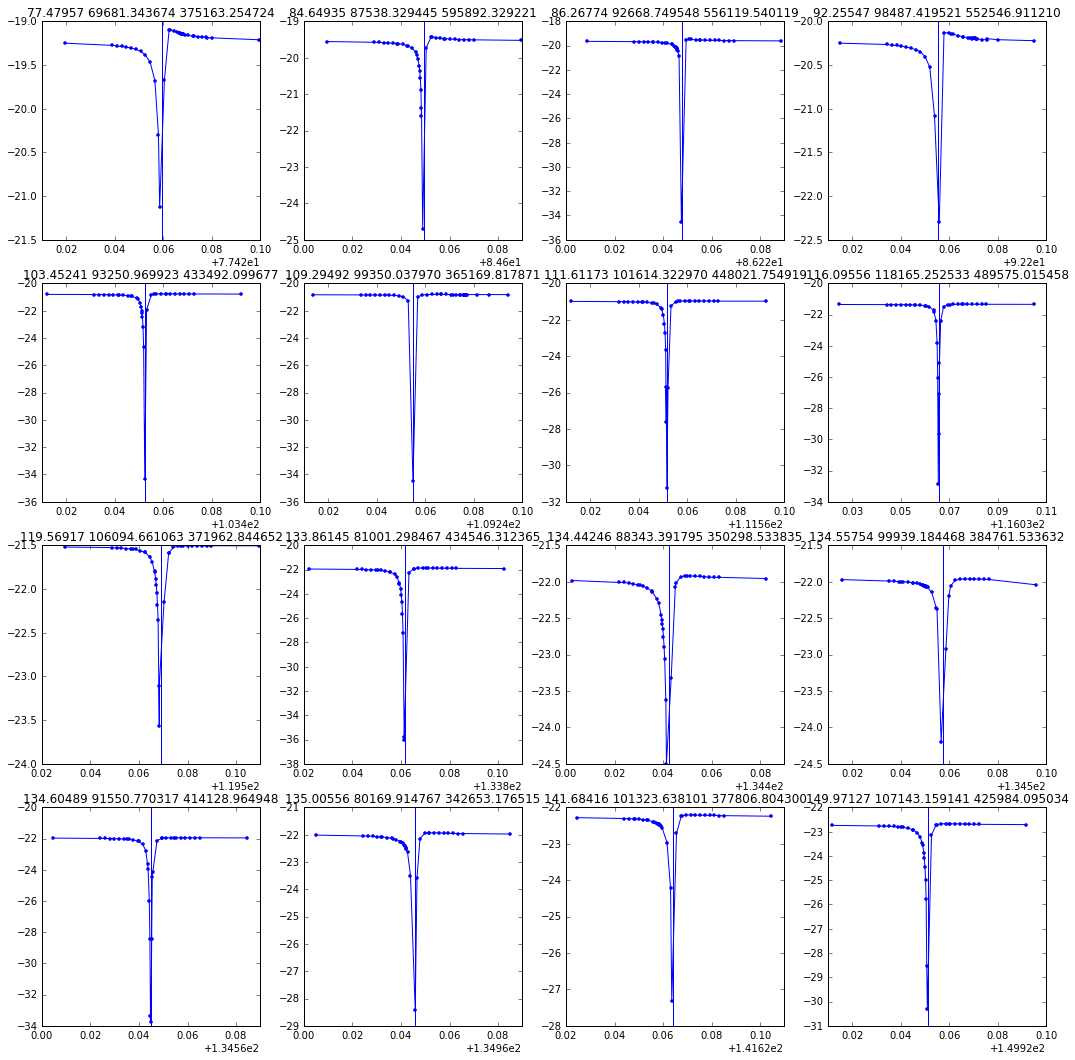

In [54]:
fig,axs = subplots(4,4,figsize=(18,18))
fits = []
for k in range(16):
    ax = axs.flatten()[k]
    fr,s21,err = rnc.sweeps[0].select_by_index(k)
    res = resonator.fit_best_resonator(fr,s21,errors=err,min_a=1,delay_estimate=-63.68)
    ax.plot(fr,20*np.log10(np.abs(s21)),'.-')
#    if np.abs(res.f_0 - 134.5556) < 1e-4:
#        print res.f_0
#        mask = np.abs(fr-134.5556) < 10e-3
#        res = resonator.fit_best_resonator(fr[mask],s21[mask],errors=err[mask],min_a=1,delay_estimate=-63.68)
#        #ax.plot(fr[mask],20*np.log10(np.abs(s21))[mask],'r',lw=2)
#        fr2 = np.linspace(res.f_0-10e-3,res.f_0+10e-3,1000)
#        ax.plot(fr2,20*np.log10(np.abs(res.model(x=fr2))),'r',lw=2)
#        print res.delay
#    elif np.abs(res.f_0-134.55904) < 1e-4:
#        print res.f_0
#        mask = np.abs(fr-134.60904) < 25e-3
#        res = resonator.fit_best_resonator(fr[mask],s21[mask],errors=err[mask],min_a=1,delay_estimate=-63.68)
#        ax.plot(fr[mask],20*np.log10(np.abs(s21))[mask],'r',lw=2)
    ax.set_title('%.5f %f %f' % (res.f_0,res.Q,res.Q_i))
    fits.append(res)
    ax.axvline(res.f_0)
    

In [56]:
import kid_readout.analysis.noise_measurement

Could not find any temperature log files in /data/readout/SRS/
updated file list


/home/gjones/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [188]:
snms = [kid_readout.analysis.noise_measurement.SweepNoiseMeasurement('/artemis/readout/2015-12-20_221639_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',
                                                                  resonator_index=k,sweep_group_index=0,timestream_group_index=0,
                                                                  delay_estimate=-63.8) for k in range(16)]

Could not find any temperature log files in /data/readout/SRS/
updated file list
Could not find any temperature log files in /data/readout/SRS/
updated file list
using NFFT: 2** 14.0
10
Could not find any temperature log files in /data/readout/SRS/
updated file list
Could not find any temperature log files in /data/readout/SRS/
updated file list
using NFFT: 2** 14.0
10
Could not find any temperature log files in /data/readout/SRS/
updated file list
Could not find any temperature log files in /data/readout/SRS/
updated file list
using NFFT: 2** 14.0
10
Could not find any temperature log files in /data/readout/SRS/
updated file list
Could not find any temperature log files in /data/readout/SRS/
updated file list
using NFFT: 2** 14.0
10
Could not find any temperature log files in /data/readout/SRS/
updated file list
Could not find any temperature log files in /data/readout/SRS/
updated file list
using NFFT: 2** 14.0
10
Could not find any temperature log files in /data/readout/SRS/
updated

In [69]:
snm.fit_params['']

OrderedDict([('f_0',
              <Parameter 'f_0', value=149.97126814097831 +/- 1.11e-05, bounds=[149.92363281249999:150.01972656250001]>),
             ('A_mag',
              <Parameter 'A_mag', value=0.07291371112438938 +/- 7.46e-05, bounds=[0:1000000.0]>),
             ('A_phase',
              <Parameter 'A_phase', value=0 (fixed), bounds=[-3.141592653589793:3.141592653589793]>),
             ('Q',
              <Parameter 'Q', value=107143.17641396826 +/- 1.34e+03, bounds=[1872.8092818428186:614281.4444444445]>),
             ('Q_e_real',
              <Parameter 'Q_e_real', value=138844.96349790975 +/- 1.22e+03, bounds=[0:1000000.0]>),
             ('Q_e_imag',
              <Parameter 'Q_e_imag', value=24441.511962816934 +/- 1.21e+03, bounds=[-1000000.0:1000000.0]>),
             ('delay',
              <Parameter 'delay', value=-63.684897671920346 +/- 0.0112, bounds=[-inf:inf]>),
             ('phi',
              <Parameter 'phi', value=0.8412023638508046 +/- 0.00296, bound

<Parameter 'Q', value=73000.191668211803 +/- 214, bounds=[967.55216802168025:inf]>
<Parameter 'Q', value=87516.688635293831 +/- 199, bounds=[1057.0999322493224:346728.77777777775]>
<Parameter 'Q', value=87781.561330309501 +/- 137, bounds=[1077.2970867208671:353353.44444444444]>
<Parameter 'Q', value=100051.18970495262 +/- 242, bounds=[1152.0846883468835:inf]>
<Parameter 'Q', value=92694.096505239868 +/- 302, bounds=[1291.8712737127371:inf]>
<Parameter 'Q', value=106060.86270385051 +/- 261, bounds=[1364.8387533875339:inf]>
<Parameter 'Q', value=101744.59200392892 +/- 415, bounds=[1393.79712543554:inf]>
<Parameter 'Q', value=115284.01082586397 +/- 256, bounds=[1449.7096883468835:475504.77777777775]>
<Parameter 'Q', value=113447.650077326 +/- 375, bounds=[1375.8607990012483:489806.44444444444]>
<Parameter 'Q', value=79039.526775509061 +/- 248, bounds=[1671.6568428184282:inf]>
<Parameter 'Q', value=91715.761625679297 +/- 432, bounds=[1678.9058265582655:inf]>
<Parameter 'Q', value=107521.28

(1e-20, 1e-16)

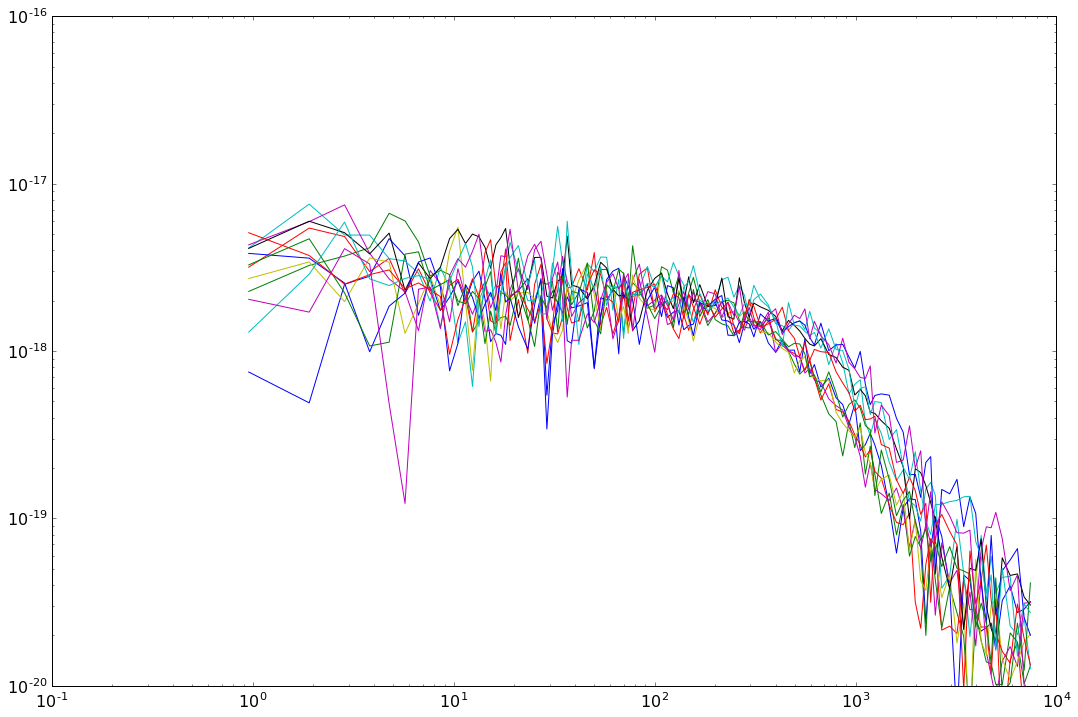

In [189]:
figure(figsize=(18,12))
for snm in snms:
    if np.median(snm.pca_eigvals[0,:]) < 3e-18:
        loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])
    print snm.fit_params['Q']
ylim(1e-20,1e-16)

<Parameter 'Q', value=73000.191668211803 +/- 214, bounds=[967.55216802168025:inf]>
<Parameter 'Q', value=87516.688635293831 +/- 199, bounds=[1057.0999322493224:346728.77777777775]>
<Parameter 'Q', value=87781.561330309501 +/- 137, bounds=[1077.2970867208671:353353.44444444444]>
<Parameter 'Q', value=100051.18970495262 +/- 242, bounds=[1152.0846883468835:inf]>
<Parameter 'Q', value=92694.096505239868 +/- 302, bounds=[1291.8712737127371:inf]>
<Parameter 'Q', value=106060.86270385051 +/- 261, bounds=[1364.8387533875339:inf]>
<Parameter 'Q', value=101744.59200392892 +/- 415, bounds=[1393.79712543554:inf]>
<Parameter 'Q', value=115284.01082586397 +/- 256, bounds=[1449.7096883468835:475504.77777777775]>
<Parameter 'Q', value=113447.650077326 +/- 375, bounds=[1375.8607990012483:489806.44444444444]>
<Parameter 'Q', value=79039.526775509061 +/- 248, bounds=[1671.6568428184282:inf]>
<Parameter 'Q', value=91715.761625679297 +/- 432, bounds=[1678.9058265582655:inf]>
<Parameter 'Q', value=107521.28

(1e-19, 1e-17)

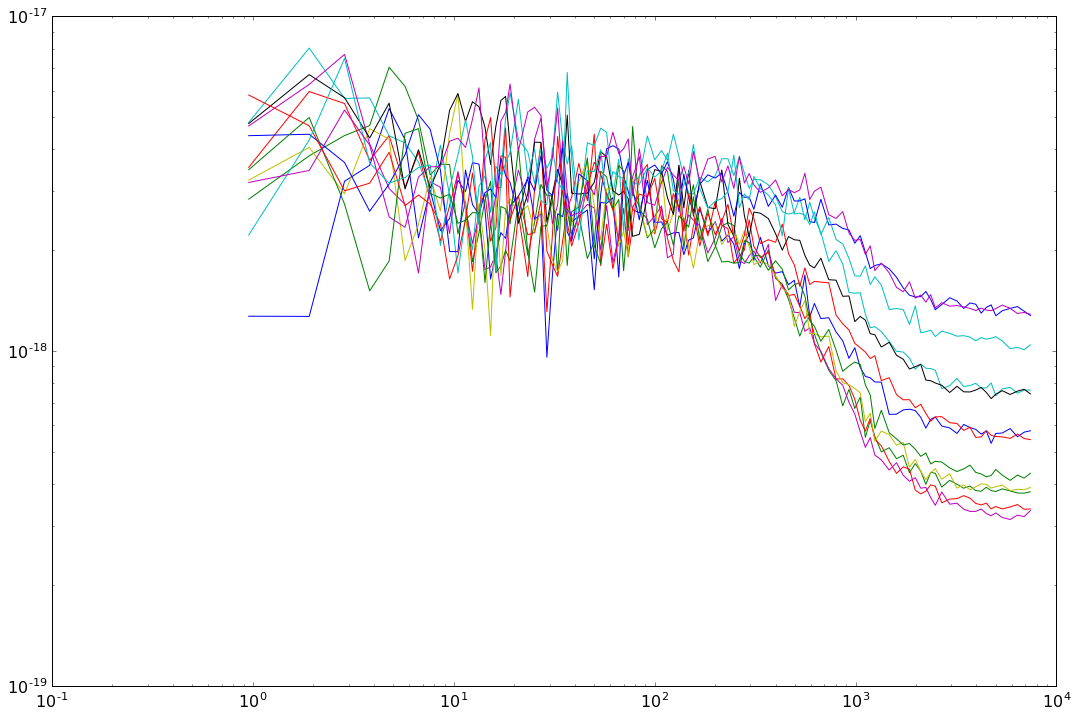

In [190]:
figure(figsize=(18,12))
for snm in snms:
    if np.median(snm.pca_eigvals[0,:]) < 3e-18:
#        loglog(snm.pca_freq,snm.pca_eigvals[1,:]-snm.pca_eigvals[0,:])
        loglog(snm.pca_freq,snm.pca_eigvals[1,:])
    print snm.fit_params['Q']
ylim(1e-19,1e-17)

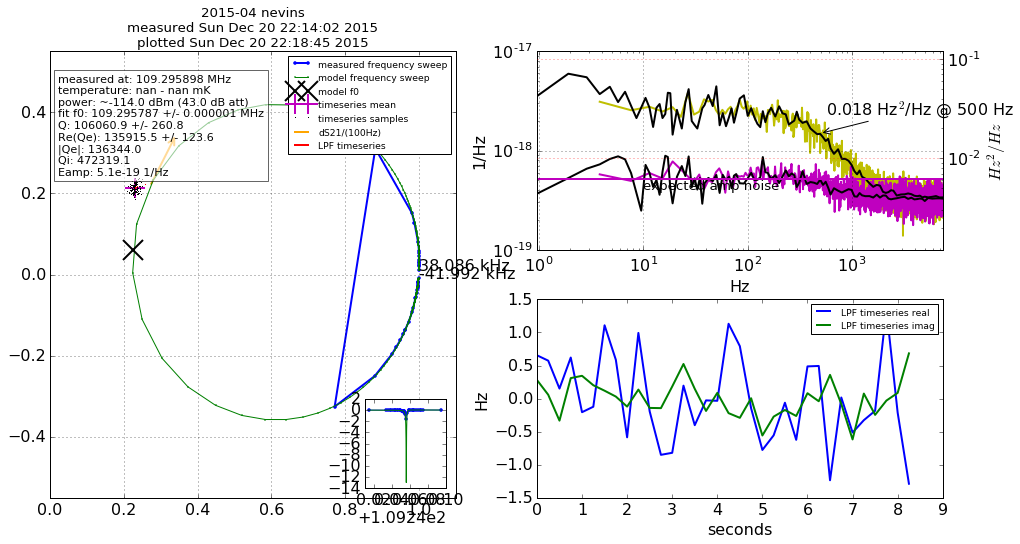

In [191]:
snm = snms[5]
blah = snm.plot()

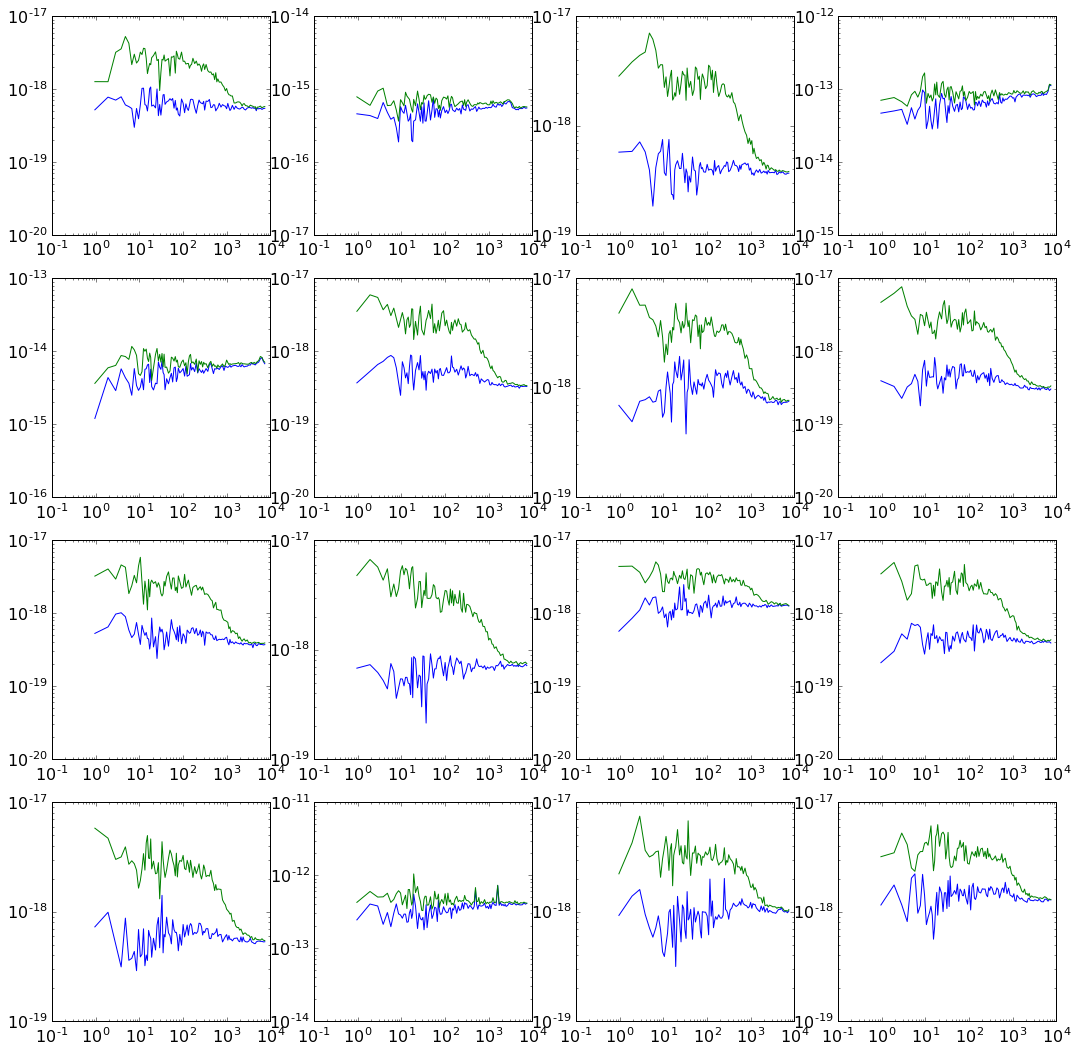

In [192]:
fig,axs = subplots(4,4,figsize=(18,18))
for k in range(16):
    ax = axs.flatten()[k]
    snm = snms[k]
    ax.loglog(snm.pca_freq,snm.pca_eigvals.T)

In [173]:
snm = snms[12]

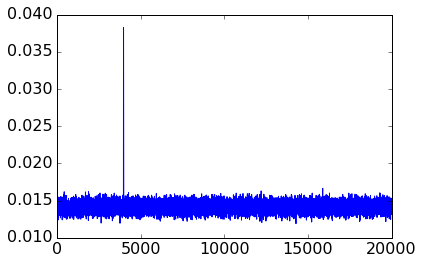

In [103]:
plot(snm.original_timeseries.imag[:20000])

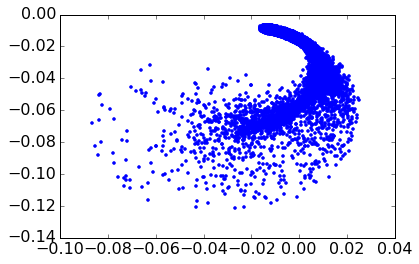

In [172]:
plot(snm.original_timeseries.real,snm.original_timeseries.imag,'.')

In [185]:
pxx,fr = mlab.psd(snm.fractional_fluctuation_timeseries.imag,NFFT=snm.fractional_fluctuation_timeseries.shape[0]//32,Fs=snm.timeseries_sample_rate)

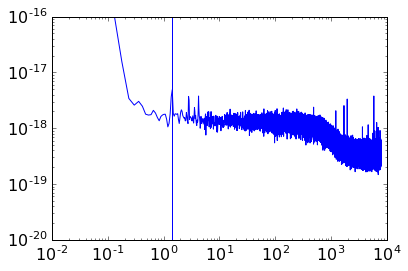

In [187]:
semilogy(fr,pxx)
#xlim(-10,10)
xscale('log')
ylim(1e-20,1e-16)
gca().axvline(1.4)

In [110]:
reload(kid_readout.analysis.process_mmw_response)

<module 'kid_readout.analysis.process_mmw_response' from '/home/gjones/kid_readout/kid_readout/analysis/process_mmw_response.py'>

In [111]:
mmw = kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2015-12-20_101610_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',0,timestream_group_index=1)

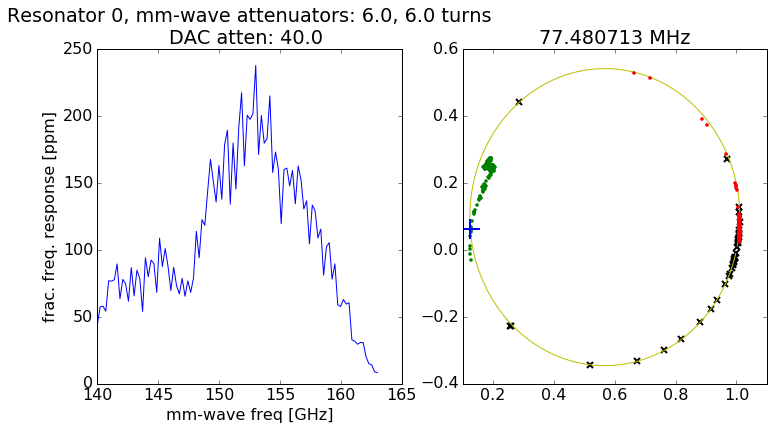

In [112]:
blah = mmw.plot()

In [113]:
mmws = [kid_readout.analysis.process_mmw_response.MmwResponse('/artemis/readout/2015-12-20_101610_mmw_frequency_sweep_hittite_level_0.000_dBm.nc',k,timestream_group_index=1)
        for k in range(16)]

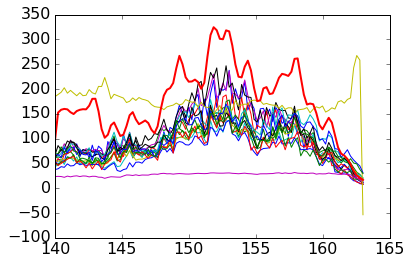

In [133]:
for mmw in mmws:
    plot(mmw.mmw_freq/1e9,mmw.mmw_frac_response*1e6)
#ylim(0.5,2)
plot(mmw.mmw_freq/1e9,mmw.zbd_voltage*1e5,lw=2)

(0.02, 0.2)

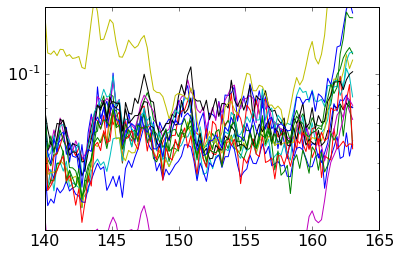

In [138]:
for mmw in mmws:
    semilogy(mmw.mmw_freq/1e9,mmw.mmw_frac_response/mmw.zbd_voltage)
ylim(.02,.2)
#plot(mmw.mmw_freq/1e9,mmw.zbd_voltage*1e5,lw=2)

In [139]:
mmw = mmws[1]

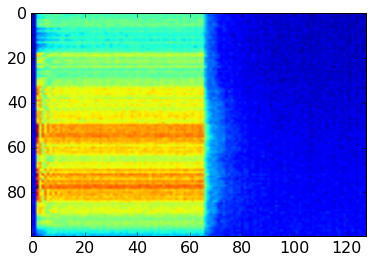

In [145]:
imshow(mmw.aligned_data.imag,aspect='auto')

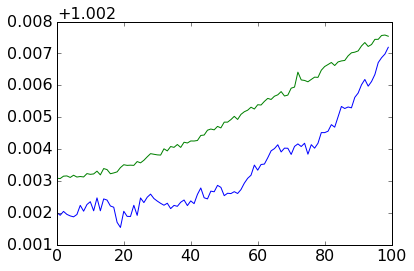

In [144]:
plot(mmw.normalized_high)
plot(mmw.normalized_low)

In [201]:
import kid_readout.utils.starcryo_temps
reload(kid_readout.utils.starcryo_temps)

updated file list


<module 'kid_readout.utils.starcryo_temps' from '/home/gjones/kid_readout/kid_readout/utils/starcryo_temps.py'>

In [195]:
import time

In [202]:
kid_readout.utils.starcryo_temps.get_temperatures_at(time.time()-3600)

/home/gjones/kid_readout/kid_readout/utils/parse_srs.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  df = read_table(fname,sep='[ ,]+',skiprows=1,converters={0:convtime},header=None)


(0.0, nan, 2.6931107087424992, nan)

In [197]:
import os

In [199]:
os.path.exists('/artemis/readout')

True

In [203]:
t,dat = kid_readout.utils.parse_srs.get_load_log('/artemis/readout/SRS/20151218-101312.txt')

In [204]:
t.shape

AttributeError: 'list' object has no attribute 'shape'

In [205]:
dat.shape

(70735, 15)

In [213]:
dat[-2,13]

2.285771

In [214]:
dat[-2]

array([  1.45070623e+09,   4.52600000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   2.09796500e+00,
         1.60951700e+03,   2.28577100e+00,   1.67335100e+03])

In [222]:
import datetime

(735952.3683101851, 735952.3749884259)

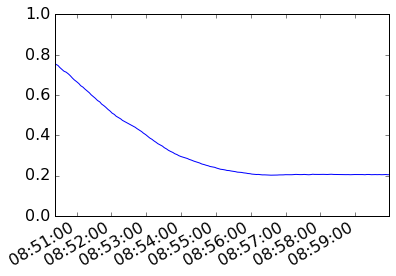

In [235]:
plot(t,dat[:,11])
ylim(0,1)
fig = gcf()
fig.autofmt_xdate()
xlim(datetime.datetime(2015, 12, 20, 8, 50, 22,),datetime.datetime(2015, 12, 20, 8, 59, 59,))
#xlim(datetime.datetime(2015,12,19,9),datetime.datetime(2015,12,20))